# Comparison of old data fitting vs optimized linalg approach

While the quadratic fit we did before was pretty good, using the minimization with the BFGS algorithm made the fit line sit just that much loser to the center. It is particularly obvious on the right (upper) side of the plot.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
from polyfit import polyfit
from read_co2 import read_co2

In [7]:
%%time
#Decided to set up classes to deal with data intake and BFGS algorithm, and the quadratic fit. 

class Chi2Min:
    def __init__(self):
        self.dates,self.data = read_co2('co2_mm_mlo.txt')
        self.err = np.full_like(self.dates, 1.0)

    def fit(self,x0):        
        return scipy.optimize.fmin_bfgs(f=self.f,fprime=self.fprime,x0=x0,gtol=1e-10)

class Chi2MinQuad (Chi2Min):
    
    def f(self,p) :
        a = p[0]
        b = p[1]
        c = p[2]
        return np.sum( ( (self.data - c - b*self.dates- a*self.dates**2) / self.err )**2 )    
    
    def fprime(self,p):
        a = p[0]
        b = p[1]
        c = p[2]
        dchi2_dc = np.sum( -2 * ((self.data - c - b*self.dates- a*self.dates**2) / self.err**2 ) )
        dchi2_db = np.sum( -2 * ((self.data - c - b*self.dates- a*self.dates**2) * self.dates    / self.err**2 ) )
        dchi2_da = np.sum( -2 * ((self.data - c - b*self.dates- a*self.dates**2) * self.dates**2 / self.err**2 ) )
        return np.array( [dchi2_da, dchi2_db, dchi2_dc] )

CPU times: user 258 µs, sys: 0 ns, total: 258 µs
Wall time: 283 µs
Compiler : 145 ms


In [8]:
plt.rcParams['figure.dpi'] = 150

         Current function value: 3506.795746
         Iterations: 5
         Function evaluations: 83
         Gradient evaluations: 71
Quadratic fit:
[ 1.25759698e-02 -4.84646545e+01  4.69947620e+04]


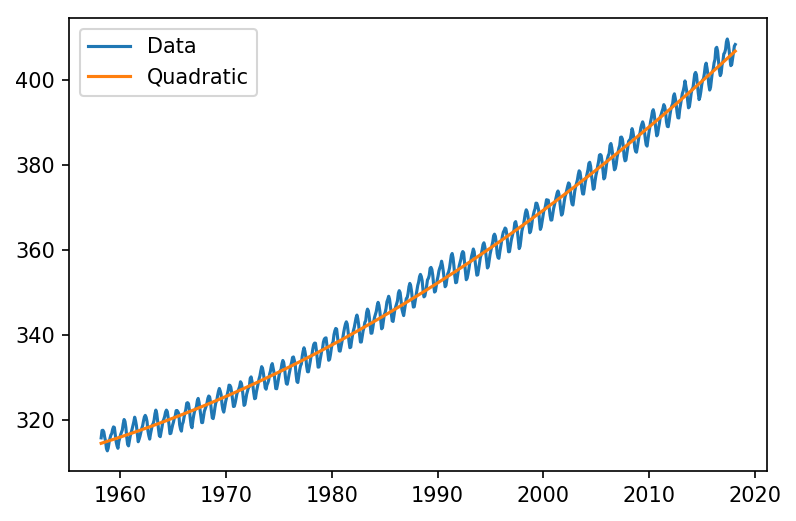

CPU times: user 1.77 s, sys: 40.4 ms, total: 1.81 s
Wall time: 1.79 s


In [9]:
%%time
f0 = Chi2MinQuad()
p0 = [0.01, -50., 50000.]
res= f0.fit(p0) 
print ('Quadratic fit:')
print(res)


plt.plot( f0.dates, f0.data, label='Data' )
plt.plot( f0.dates, res[0]*f0.dates**2 + res[1] * f0.dates + res[2], label='Quadratic')
plt.legend()
plt.show()

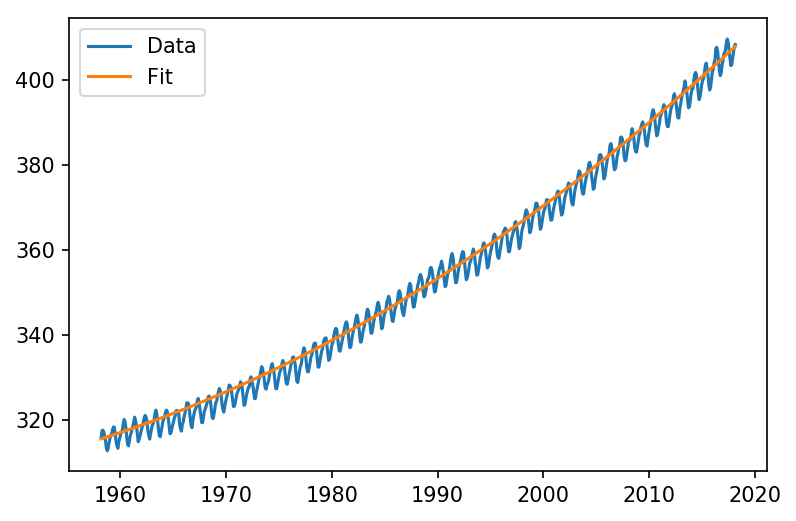

 chi-square/d.o.f. =  6.04281938417349
 a[  0] = +2.55e+04 +- +7.16e+04
 a[  1] = -1.60e+01 +- +1.08e+02
 a[  2] = -3.76e-03 +- +5.44e-02
 a[  3] = +2.74e-06 +- +9.12e-06
CPU times: user 1.58 s, sys: 15.8 ms, total: 1.6 s
Wall time: 1.6 s


In [10]:
%%time
#Version from assignment 6
# Get the CO2 data
dates,data = read_co2('co2_mm_mlo.txt')

# Set uncertainties to 1 for all points
err = np.full_like(data, 1.)

# Fit to polynomial
M = 3
a, siga, C, chi2, yfit = polyfit(dates,data,err,M)

plt.plot( dates, data, label="Data")
plt.plot(dates,yfit, label="Fit")
plt.legend()
plt.show()

if len(data) - 3 > 0 :
    print (' chi-square/d.o.f. = ', chi2/(len(data)-3))
    for i in range(M+1):
        print ( ' a[%3d] = %+6.2e +- %+6.2e' % (i, a[i], siga[i]) )

